In [2]:
# Import all the necessary libraries

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import statsmodels
from datetime import datetime
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [3]:
pwd

'C:\\Users\\esaeri-1122'

In [4]:
df = pd.read_csv(r'\\USLA-FS01\Users$\esaeri-1122\Desktop\M1045_000_forecast.csv',index_col='Date',parse_dates=True)
print(df)

            M1045-000
Date                 
2015-01-01        NaN
2015-02-01        NaN
2015-03-01        NaN
2015-04-01        NaN
2015-05-01     6019.0
2015-06-01     4885.0
2015-07-01    44276.0
2015-08-01    14798.0
2015-09-01     4310.0
2015-10-01     8736.0
2015-11-01    20174.0
2015-12-01     5000.0
2016-01-01     4667.0
2016-02-01     6066.0
2016-03-01     3440.0
2016-04-01    11385.0
2016-05-01     4934.0
2016-06-01     5755.0
2016-07-01     3707.0
2016-08-01     6149.0
2016-09-01     1962.0
2016-10-01     8312.0
2016-11-01     6614.0
2016-12-01    13450.0
2017-01-01     3532.0
2017-02-01     3264.0
2017-03-01     9039.0
2017-04-01     5296.0
2017-05-01    43218.0
2017-06-01    10821.0
2017-07-01     4441.0
2017-08-01     8916.0
2017-09-01     5388.0
2017-10-01     4609.0
2017-11-01     4428.0
2017-12-01     2435.0
2018-01-01     2891.0
2018-02-01     5938.0
2018-03-01    16197.0
2018-04-01    11993.0
2018-05-01    10825.0
2018-06-01    23629.0
2018-07-01    13656.0
2018-08-01

In [ ]:
# df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)
# indexeddf = df.set_index(['Month'])

In [5]:
df.head()

,M1045-000
Date,
2015-01-01,NaN
2015-02-01,NaN
2015-03-01,NaN
2015-04-01,NaN
2015-05-01,6019.0


In [6]:
df.tail()

,M1045-000
Date,
2019-06-01,11303.0
2019-07-01,9992.0
2019-08-01,11289.0
2019-09-01,10999.0
2019-10-01,16500.0


In [7]:
# Drop NaN when 
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 2015-05-01 to 2019-10-01
Data columns (total 1 columns):
M1045-000    54 non-null float64
dtypes: float64(1)
memory usage: 864.0 bytes


In [9]:
df.describe()

,M1045-000
count,54.000000
mean,10240.296296
std,8693.347946
min,1962.000000
25%,4897.250000
50%,7575.500000
75%,11364.500000
max,44276.000000


In [ ]:
# df["M1045-000"].fillna(df["M1045-000"].mean(), inplace=True)

In [10]:
df.columns.values

array(['M1045-000'], dtype=object)

In [25]:
print(df)

            M1045-000
Date                 
2015-05-01     6019.0
2015-06-01     4885.0
2015-07-01    44276.0
2015-08-01    14798.0
2015-09-01     4310.0
2015-10-01     8736.0
2015-11-01    20174.0
2015-12-01     5000.0
2016-01-01     4667.0
2016-02-01     6066.0
2016-03-01     3440.0
2016-04-01    11385.0
2016-05-01     4934.0
2016-06-01     5755.0
2016-07-01     3707.0
2016-08-01     6149.0
2016-09-01     1962.0
2016-10-01     8312.0
2016-11-01     6614.0
2016-12-01    13450.0
2017-01-01     3532.0
2017-02-01     3264.0
2017-03-01     9039.0
2017-04-01     5296.0
2017-05-01    43218.0
2017-06-01    10821.0
2017-07-01     4441.0
2017-08-01     8916.0
2017-09-01     5388.0
2017-10-01     4609.0
2017-11-01     4428.0
2017-12-01     2435.0
2018-01-01     2891.0
2018-02-01     5938.0
2018-03-01    16197.0
2018-04-01    11993.0
2018-05-01    10825.0
2018-06-01    23629.0
2018-07-01    13656.0
2018-08-01     8418.0
2018-09-01     6368.0
2018-10-01    10708.0
2018-11-01     6839.0
2018-12-01

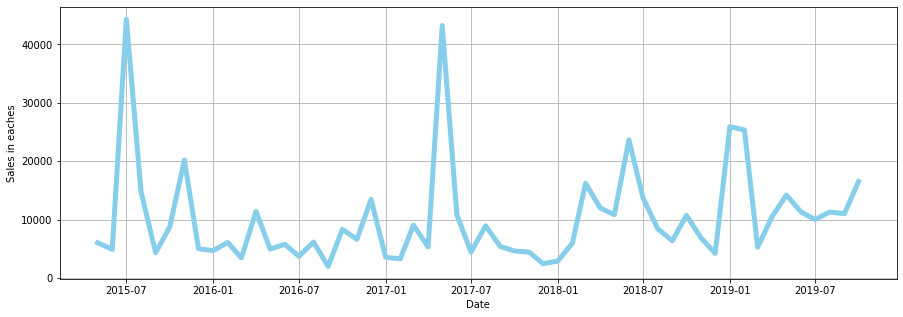

In [31]:
### Plot the graph
fig = plt.figure(figsize=(15,5),facecolor='w')
plt.xlabel("Date")
plt.ylabel("Sales in eaches")
plt.grid()
plt.plot(df, color='skyblue', linewidth=5);

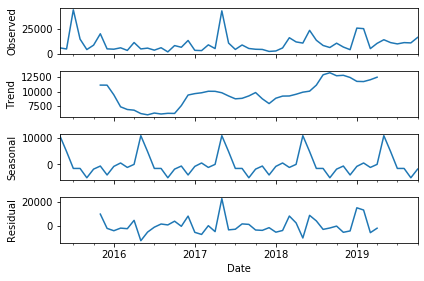

In [12]:
result = seasonal_decompose(df['M1045-000'], model='additive')  # model='mul' also works
result.plot();

In [13]:
# Rolling Statistics
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()
print(rolmean, rolstd)

               M1045-000
Date                    
2015-05-01           NaN
2015-06-01           NaN
2015-07-01           NaN
2015-08-01           NaN
2015-09-01           NaN
2015-10-01           NaN
2015-11-01           NaN
2015-12-01           NaN
2016-01-01           NaN
2016-02-01           NaN
2016-03-01           NaN
2016-04-01  11146.333333
2016-05-01  11055.916667
2016-06-01  11128.416667
2016-07-01   7747.666667
2016-08-01   7026.916667
2016-09-01   6831.250000
2016-10-01   6795.916667
2016-11-01   5665.916667
2016-12-01   6370.083333
2017-01-01   6275.500000
2017-02-01   6042.000000
2017-03-01   6508.583333
2017-04-01   6001.166667
2017-05-01   9191.500000
2017-06-01   9613.666667
2017-07-01   9674.833333
2017-08-01   9905.416667
2017-09-01  10190.916667
2017-10-01   9882.333333
2017-11-01   9700.166667
2017-12-01   8782.250000
2018-01-01   8728.833333
2018-02-01   8951.666667
2018-03-01   9548.166667
2018-04-01  10106.250000
2018-05-01   7406.833333
2018-06-01   8474.166667


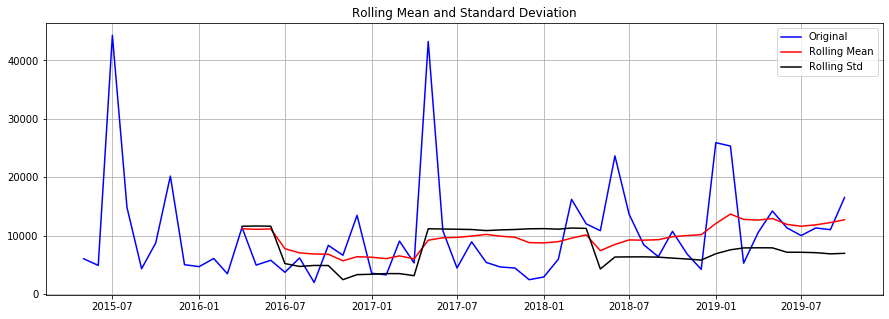

In [35]:
fig = plt.figure(figsize=(15,5),facecolor='w')
orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.grid()
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [15]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(df['M1045-000'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.541228e+00
p-value                        9.335965e-09
#Lags Used                     0.000000e+00
Number of Observations Used    5.300000e+01
Critical Value (1%)           -3.560242e+00
Critical Value (5%)           -2.917850e+00
Critical Value (10%)          -2.596796e+00
dtype: float64


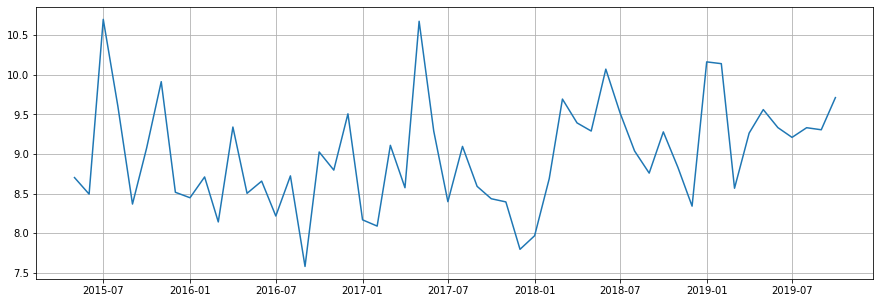

In [33]:
#estimating Trend
fig = plt.figure(figsize=(15,5),facecolor='w')
df_logScale = np.log(df)
plt.grid()
plt.plot(df_logScale)

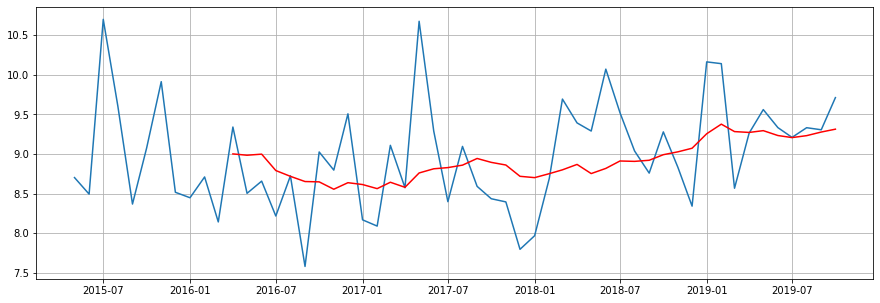

In [34]:
fig = plt.figure(figsize=(15,5),facecolor='w')
movingAverage = df_logScale.rolling(window=12).mean()
movingSTD = df_logScale.rolling(window=12).std()
plt.plot(df_logScale)
plt.grid()
plt.plot(movingAverage, color='red');

In [18]:
datasetLogScaleMinusMovingAverage = df_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NaN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,M1045-000
Date,
2016-04-01,0.339027
2016-05-01,-0.480555
2016-06-01,-0.340294
2016-07-01,-0.573455
2016-08-01,0.005795
2016-09-01,-1.070949
2016-10-01,0.376933
2016-11-01,0.241355
2016-12-01,0.868683


In [28]:
# X = df.iloc['Date']
# y = df.iloc['M1045-000']

In [27]:
# M1045_train, M1045_test, y_train, y_test = train_test_split(M1045, y, test_size = 1/3, random_state = 0)

NameError: name 'M1045' is not defined

In [ ]:
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

In [ ]:
# X = DataFrame(df, columns=['Dates'])
# y = DataFrame(df, columns=['M1045-000'])

In [ ]:
# plt.figure(figsize=(15,5))
# plt.scatter(X, y)
# plt.title('M1045-000')
# plt.xlabel('Month-Year')
# plt.ylabel('Sales in Eaches')
# # plt.ylim(0, 3000000000)
# # plt.xlim(0, 450000000)
# plt.show()

In [ ]:
# # Create the linear regression object
# lm = LinearRegression()
# lm